In [1]:
import pandas as pd
names = pd.read_csv('datasets/babynames/yob1880.txt', names=['name','sex','births'])
names['year'] = 1880

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import seaborn as sns

In [4]:
names.head(3)

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880


In [5]:
names.groupby('sex')['births'].sum().reset_index()

,sex,births
0,F,90993
1,M,110493


In [6]:
years = list(range(1881, 2011))

for year in years:
    name = pd.read_csv('datasets/babynames/yob' + str(year) + '.txt', names=['name','sex','births'])
    name['year'] = year
    names = pd.concat([names, name], ignore_index=True)

In [7]:
names.shape

(1690784, 4)

In [8]:
by_year = names.groupby(['year','sex']).sum().unstack()
by_year.columns = by_year.columns.droplevel()
by_year.columns.name = None
by_year = by_year.reset_index()

In [9]:
by_year.head(2)

,year,F,M
0,1880,90993,110493
1,1881,91955,100748


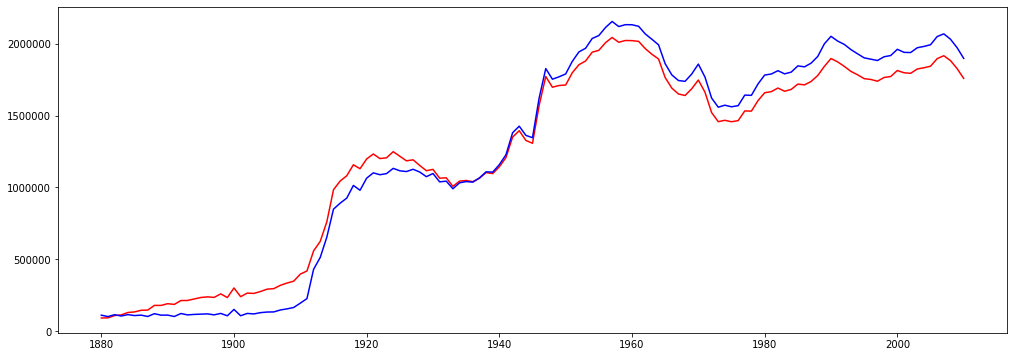

In [10]:
plt.figure(figsize=(17,6))
plt.plot(by_year.year, by_year.F, color='r')
plt.plot(by_year.year, by_year.M, color='b');

In [11]:
def get_prop(group):
    group['prop'] = group['births'] / group['births'].sum()
    return group

by_name = names.groupby(['year','sex']).apply(get_prop)
by_name.head(3)

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013


In [12]:
# sanity check
by_name.groupby(['year','sex'])['prop'].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [13]:
# only select top 1000 names each year for F and M
def top1000(group):
    return group.sort_values('prop',ascending=False)[:1000]

name2 = by_name.groupby(['year','sex'],as_index=False).apply(top1000).droplevel(0)
print(name2.shape)
name2.head(3)

(261877, 5)


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013


In [14]:
boys = name2[name2.sex=='M']
girls = name2[name2.sex=='F']
boys.head(2)

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277


In [15]:
boys2 = boys.pivot_table(values='births',columns='year',index='name').fillna(0).reset_index()
boys2.columns.name=None
boys2.head(2)

,name,1880,1881,1882,1883,1884,1885,1886,1887,1888,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Aaden,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,955.0,1265.0,448.0
1,Aarav,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,219.0,270.0,438.0


In [16]:
# plot trend of certain names from 1880 to 2010
def plot_trend(name, df):
    trend = df[df['name']==name].drop('name',axis=1).values[0]
    plt.figure(figsize=(17,5))
    plt.plot(list(range(1880,2011)),trend)
    plt.xticks(ticks=range(1880, 2012, 10))
    plt.legend(name, loc='best')

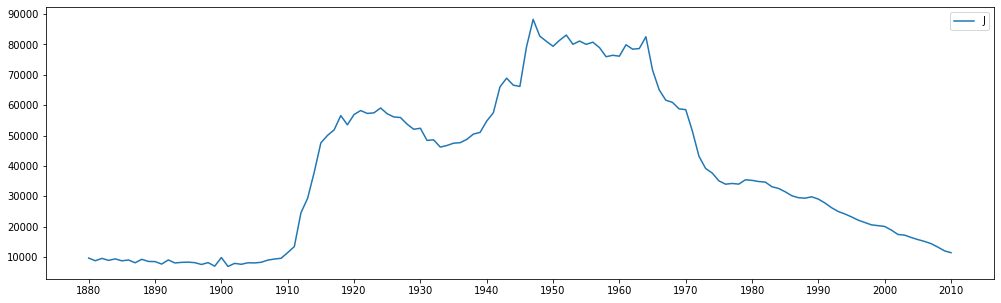

In [17]:
plot_trend('John',boys2)

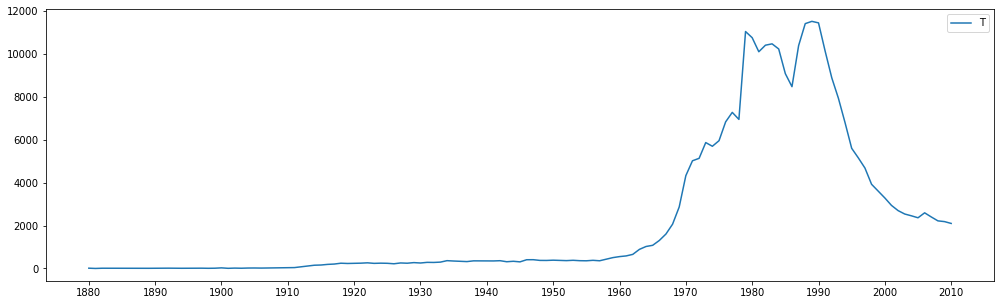

In [18]:
plot_trend('Travis',boys2)

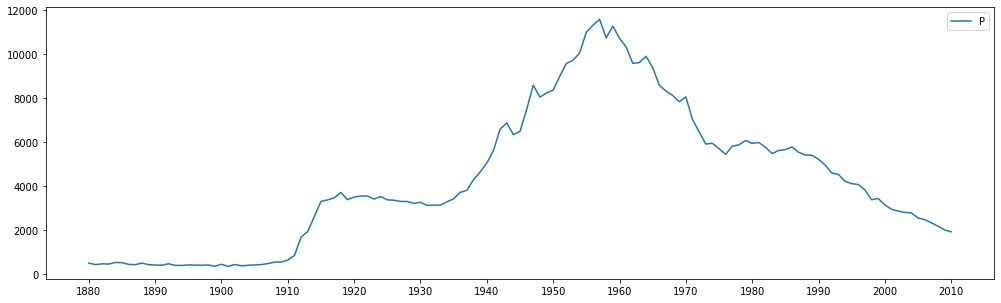

In [19]:
plot_trend('Peter',boys2)

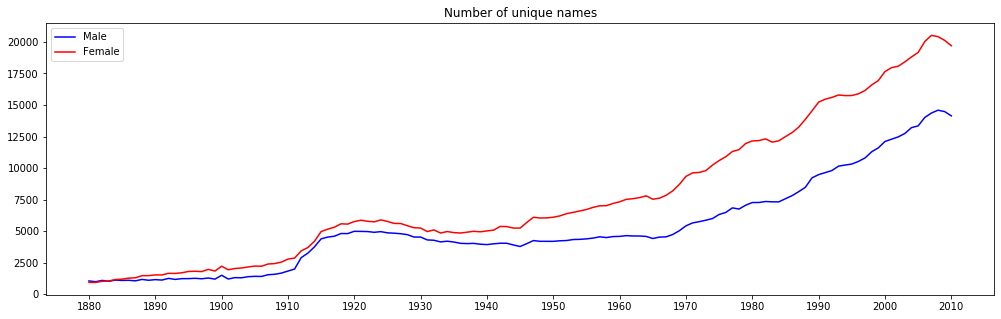

In [20]:
unique_name = by_name.groupby(['year','sex'])['name'].nunique().unstack()
unique_name.columns.name=None
unique_name = unique_name.reset_index()

# trend of number of unique names
plt.figure(figsize=(17,5))
plt.plot(unique_name.year, unique_name.M, color='b')
plt.plot(unique_name.year, unique_name.F, color='r')
plt.legend(['Male','Female'])
plt.xticks(ticks=range(1880, 2012, 10))
plt.title('Number of unique names');

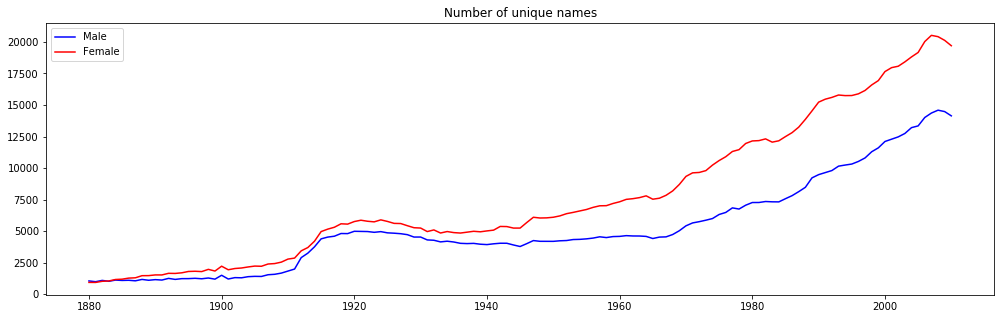

In [21]:
unique_name = by_name.groupby(['year','sex'])['name'].nunique().unstack()
unique_name.columns.name=None
unique_name = unique_name.reset_index()

# trend of number of unique names
plt.figure(figsize=(17,5))
plt.plot(unique_name.year, unique_name.M, color='b')
plt.plot(unique_name.year, unique_name.F, color='r')
plt.legend(['Male','Female'])
plt.title('Number of unique names');

In [22]:
by_name.head(2)

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618


In [23]:
def c_sum(group):
    group['csum'] = group.cumsum()['prop']
    group = group.sort_values('births',ascending=False)
    return group[group.csum <= 0.5]

In [24]:
by_name_50 = by_name.groupby(['year','sex'],as_index=False).apply(c_sum)
by_name_50.head(2)

name sex  births  year      prop      csum
0 0  Mary   F    7065  1880  0.077643  0.077643
  1  Anna   F    2604  1880  0.028618  0.106261

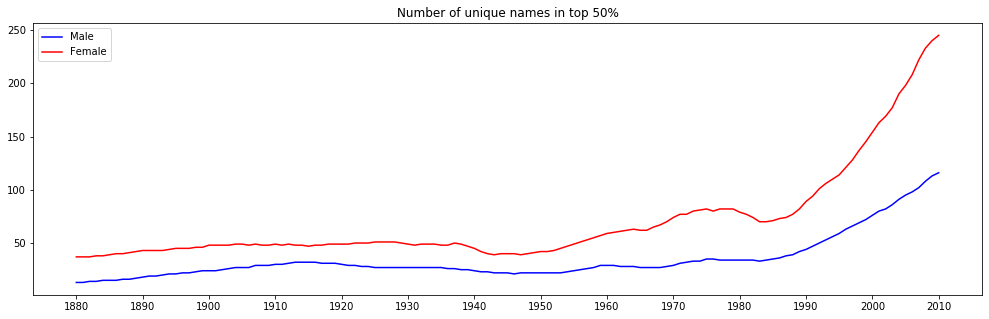

In [25]:
top_unique_name = by_name_50.groupby(['year','sex'])['name'].nunique().unstack()
top_unique_name.columns.name=None
top_unique_name = top_unique_name.reset_index()

# trend of number of unique names
plt.figure(figsize=(17,5))
plt.plot(top_unique_name.year, top_unique_name.M, color='b')
plt.plot(top_unique_name.year, top_unique_name.F, color='r')
plt.legend(['Male','Female'])
plt.xticks(ticks=range(1880, 2012, 10))
plt.title('Number of unique names in top 50%');

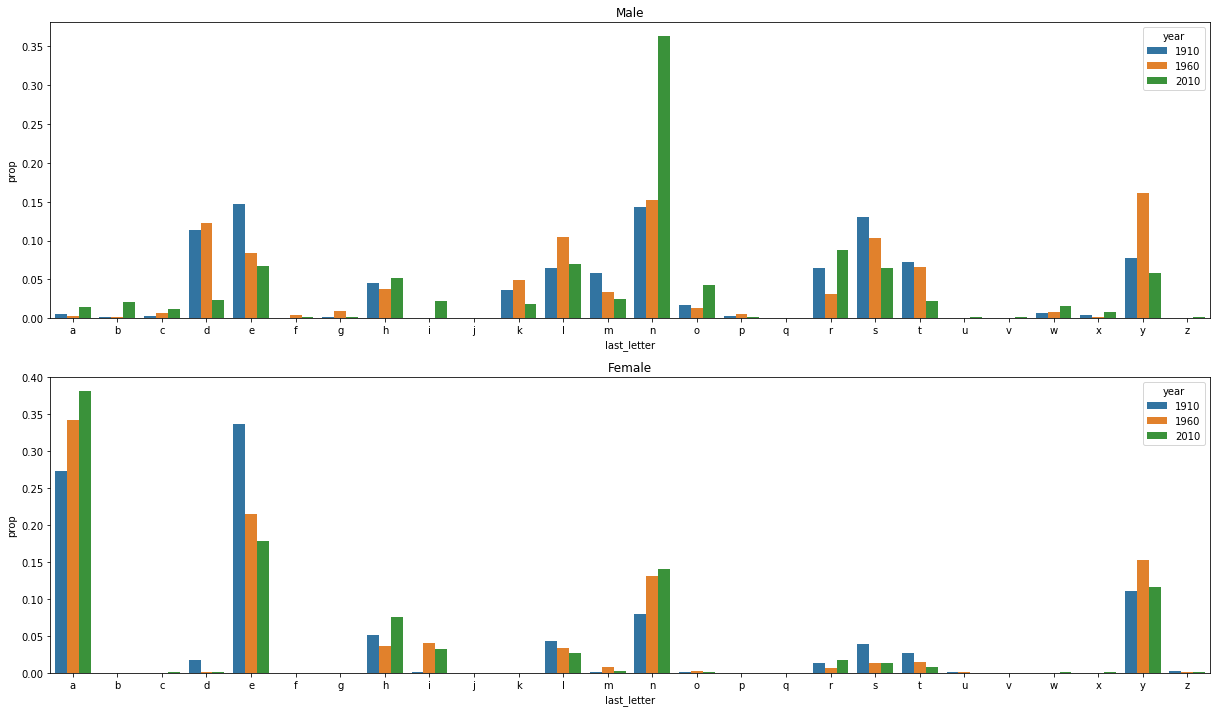

In [26]:
# see trend of last letter from 1910 to 2010
by_name['last_letter'] = by_name.name.apply(lambda x: x[-1])
toplastletter = by_name[by_name.year.isin([1910,1960,2010])].groupby(['year','sex','last_letter'])['births'].sum().reset_index()
def get_prop(group):
    group['prop'] = group['births'] / group['births'].sum()
    return group

toplastletter = toplastletter.groupby(['year','sex']).apply(get_prop)


plt.figure(figsize=(17,10))
f = toplastletter[toplastletter['sex']=='F']
m = toplastletter[toplastletter['sex']=='M']

plt.subplot(2,1,1)
sns.barplot(x=m.last_letter, y=m.prop, hue=m.year, order=sorted(set(toplastletter.last_letter)))
plt.title('Male')
plt.subplot(2,1,2)
sns.barplot(x=f.last_letter, y=f.prop, hue=f.year, order=sorted(set(toplastletter.last_letter)))
plt.title('Female')
plt.tight_layout();

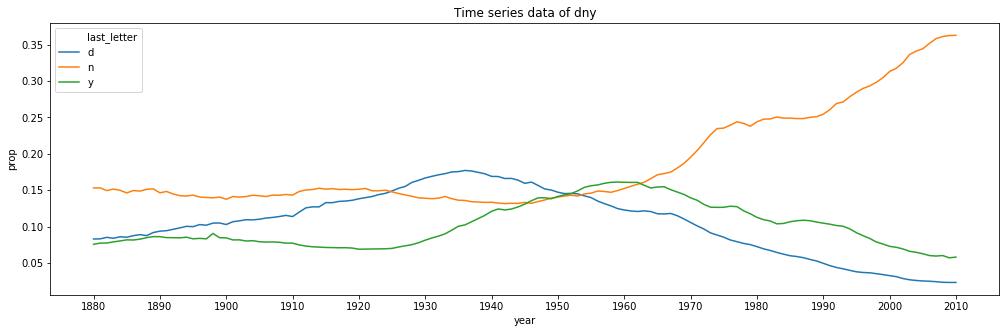

In [27]:
m_dny = by_name[(by_name.last_letter.isin(['d','n','y'])) & (by_name.sex=='M')].groupby(['year','last_letter'])['prop'].sum().reset_index()

plt.figure(figsize=(17,5))
sns.lineplot(x=m_dny['year'],y=m_dny['prop'],hue=m_dny['last_letter'])
plt.xticks(ticks=range(1880, 2012, 10))
plt.title('Time series data of dny');